### Importing Modules

In [2]:
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from peakutils import baseline
from scipy.integrate import trapezoid as trap
import pencil as pc
from IPython.display import display, Math, Latex

         pencil has moved to pencil_old.
To change your scripts accordingly:
import pencilnew as pc -> import pencil as pc
import pencil as pc -> import pencil_old as pc


In [3]:
plt.rcParams.update({'font.size': 16})
plt.rcParams['text.usetex'] = True

## Variation of Thermodynamic Variables along z

### reading xy_aver file and grid

In [4]:
#reading the grid
grid = pc.read.grid(trim=True, quiet=True)
z = grid.z

Read 2414 lines.


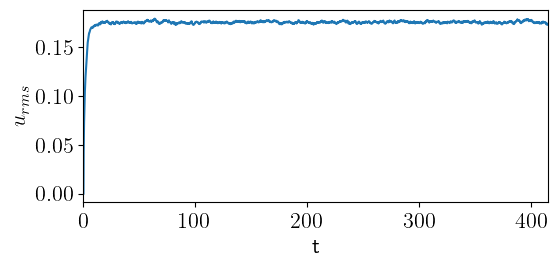

In [5]:
ts = pc.read.ts()
plt.figure(figsize=(6,2.5))
plt.plot(ts.t, ts.urms)
plt.xlim(ts.t[0], ts.t[-1])
plt.xlabel("t")
plt.ylabel(r"$u_{rms}$")
plt.show()

In [6]:
# plt.figure(figsize=(6,2.5))
# plt.plot(ts.t, ts.brms)
# plt.xlim(ts.t[0], ts.t[-1])
# # plt.yscale('log')
# plt.xlabel("t")
# plt.ylabel(r"$b_{rms}$")
# plt.show()

In [7]:
#reading the xy_aver file
xya=pc.read.aver(plane_list=['xy'])
rho = xya.xy.rhomz[-1,:]
pre = xya.xy.ppmz[-1,:]
tem = xya.xy.TTmz[-1,:]

### plotting 

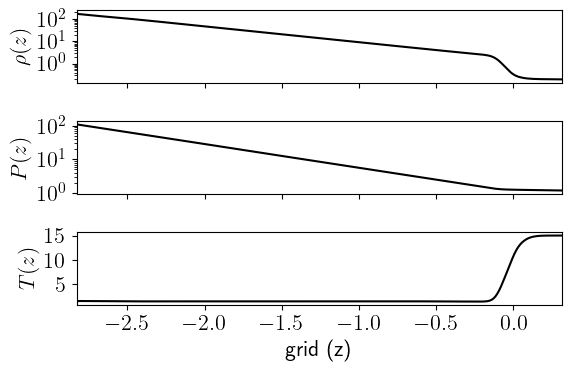

In [8]:
fig, axs = plt.subplots(3,1, figsize=(6,4), sharex=True)

axs[0].plot(grid.z, rho, color='k')
axs[1].plot(grid.z, pre, color='k')
axs[2].plot(grid.z, tem, color='k')
#axs[2].plot(grid.z, xya.xy.TTmz[-1], color='k')

axs[0].set_yscale("log")
axs[1].set_yscale("log")
# axs[2].set_yscale("log")

axs[2].set_xlim(z[0], z[-1])

axs[0].set_ylabel(r"$\rho(z)$")
axs[1].set_ylabel(r"$P(z)$")
axs[2].set_ylabel(r"$T(z)$")

plt.xlabel("grid (z)")
plt.tight_layout()
#plt.savefig("variation.jpg")

## determining the temp of the lower layer

### reading timeseries data

In [9]:
# ts = pc.read.ts()

In [10]:
def g(t, a):
    return a

i_l = np.argmin(abs(z+2.5))
j_l = np.argmin(abs(z+1.5))

z_l = z[i_l:j_l]
T_l = tem[i_l:j_l]

popt_l, pcov_l = curve_fit(g, z_l, T_l)

# z_fit_l = ts.t[i_l:j_l]
z_fit_l = z[i_l:j_l]
T_fit_l = g(z_fit_l, popt_l[0])
T_ave_l = round(np.average(T_fit_l),3)
display(Latex(fr'$T_d$ = {T_ave_l}'))
T_d = T_ave_l

<IPython.core.display.Latex object>

In [11]:
i_u = np.argmin(abs(z-0.01))
j_u = np.argmin(abs(z-0.5))

z_u = z[i_u:j_u]
T_u = tem[i_u:j_u]

popt_u, pcov_u = curve_fit(g, z_u, T_u)

z_fit_u = z[i_u:j_u]
T_fit_u = g(z_fit_u, popt_u[0])
T_ave_u = round(np.average(T_fit_u),3)
display(Latex(fr'$T_u$ = {T_ave_u}'))
T_u = T_ave_u

<IPython.core.display.Latex object>

In [12]:
q = T_ave_l/T_ave_u
display(Latex(fr'$q$ = {np.round(q,3)}'))

<IPython.core.display.Latex object>

## Calculating other parameters

In [13]:
param = pc.read.param()
cp = param.cp
display(Latex(fr'$c_p$ = {cp}'))
gamma = np.round(param.gamma, 3)
display(Latex(fr'$\gamma$ = {gamma}'))
R = np.round(cp*(1-(1/gamma)), 4)
display(Latex(fr'$R$ = {R}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [14]:
cs_d = np.round(np.sqrt(gamma*R*T_ave_l), 3)
display(Latex(fr'$c_{{sd}}$ = {cs_d}'))
cs_u = np.round(np.sqrt(gamma*R*T_ave_u), 3)
display(Latex(fr'$c_{{su}}$ = {cs_u}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [15]:
gz = 1.0
L0 = np.round(cs_d**2/gz, 3)
display(Latex(fr'$L_0$ = {L0}'))
omega0 = np.round(gz/cs_d, 3)
display(Latex(fr'$\omega_0$ = {omega0}'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [16]:
#for st_li2ne fi2tti2ng
def g(t, a, b):
    return a*t+b

i2 = np.argmin(abs(ts.t-20))
j2 = np.argmin(abs(ts.t- 150))

t_lin = ts.t[i2:j2]
u_lin = ts.urms[i2:j2]

popt, pcov = curve_fit(g, t_lin, u_lin)

t_fit = ts.t[i2:j2]
u_fit = g(t_fit, popt[0], popt[1])
u_ave = round(np.average(u_fit),4)
display(Latex(fr'$u_{{rms}}$ = {u_ave}'))
#np.shape(i2)
#u_fit

<IPython.core.display.Latex object>

In [17]:
D = np.round(L0*u_ave/cs_d, 5)
# D = np.round(L0*0.0005538/cs_d, 5)
display(Latex(fr'$D$ = {D}'))

<IPython.core.display.Latex object>

## reading poweruz_xy.dat 

In [17]:
power = pc.read.power()

poweruz_xy.dat


In [ ]:
power.t.shape

(34129,)

In [ ]:
power.t[-1]

170.64754

### We can notice that $u_{rms}$ saturates at around $t=100$, hence we will consider $u_z(t,x,z)$ after this $t$    
Here we have taken t=100

In [ ]:
uz_real = power.uz_xy

In [ ]:
uz_real.shape

(34129, 1, 256, 66)

In [ ]:
power.t.shape, ts.t.shape

((34129,), (989,))

In [ ]:
size = np.shape(uz_real)
#size
nx = size[1]
nz = size[2]
nt = size[0]

tt = power.t
len(grid.x)

1024

readding the parameters

In [ ]:
param = pc.read.param()

In [ ]:
lxyz = param.lxyz   #shape of the box
grz = -param.gravz  #value of g along z direction
cp = param.cp
lx = lxyz[0]
ly = lxyz[1]
lz = lxyz[2]
lz

3.141592653589793

In [ ]:
indx_z_surf = 249    #selecting the plane to observe f-modes
# indx_t1 = np.argmin(np.abs(tt - 100))  #to avoid the transient effects below t=170
indx_t1 = -40000  #to avoid the transient effects below t=170
# indx_t1 = -10000  #to avoid the transient effects below t=170
indx_t2 = -1

### for the full data

In [ ]:
t_gd = tt[indx_t1:indx_t2]  #time interval where urms has reached a steady state
t_len = np.max(t_gd)-np.min(t_gd)

dkx = 2*np.pi/lx    #unit step along kx direction
dom = 2*np.pi/t_len #unit step alomg omega direction

In [ ]:
len(t_gd)

34128

In [ ]:
t_gd

array([8.1121642e-03, 1.2978944e-02, 1.7952459e-02, ..., 1.7063261e+02,
       1.7063757e+02, 1.7064252e+02], dtype=float32)

shape of the data

In [ ]:
uz_real[indx_t1:indx_t2,:,:].shape

(34128, 1, 256, 66)

In [ ]:
np.shape(uz_real[indx_t1:indx_t2,:,:])

(34128, 1, 256, 66)

### taking fourier transform of $u_z(t,x,z=0)$ to get $\hat{u}_z(\omega,k_x)$

### for full data

In [ ]:
# uz_fourier = np.fft.fft(uz_real[:,0,:], axis=(0), norm='forward')
uz_fourier = np.fft.fft(uz_real[indx_t1:indx_t2,0,33,:], axis=(0), norm='forward')
uz_fourier = np.fft.fftshift(uz_fourier, axes=(0))
# uz_fourier = uz_real[indx_t1:indx_t2,0,:]

In [ ]:
uz_fourier.shape

(34128, 66)

### we can construct the dimensionless quantity 
$\tilde{P}(\omega,k_x)=\frac{|\hat{u}_z|}{D^2}$

In [ ]:
logP = np.log(np.abs(uz_fourier/D**2))

### defining $\tilde{k}_x=k_xL_0, \hspace{2mm} \tilde{\omega}=\frac{\omega}{\omega_0}$

In [ ]:
T = t_gd.shape[0]

In [ ]:
np.shape(t_gd)

(34128,)

In [ ]:
dom

0.03682250078973097

In [ ]:
np.arange(0, T/2)

array([0.0000e+00, 1.0000e+00, 2.0000e+00, ..., 1.7061e+04, 1.7062e+04,
       1.7063e+04])

In [ ]:
if T%2 == 0:
    fom = np.arange(0, T/2)
    rom = -np.flip(np.arange(1, T/2+1))
    om = np.concatenate((rom, fom))*dom
else:
    fom = np.arange(0, T/2)
    rom = -np.flip(np.arange(1, T/2))
    om = np.concatenate((rom, fom))*dom

In [ ]:
om

array([-628.33915348, -628.30233098, -628.26550847, ...,  628.22868597,
        628.26550847,  628.30233098])

In [ ]:
# if nx%2 == 0:
#     fnx = np.arange(0, nx/2)
#     rnx = -np.flip(np.arange(1, nx/2))
#     kx = np.concatenate((fnx, rnx))*dkx
# else:
#     fnx = np.arange(0, nx/2+1)
#     rnx = -np.flip(np.arange(1, nx/2))
#     kx = np.concatenate((fnx, rnx))*dkx

In [ ]:
# om.shape, kx.shape 

In [ ]:
kx = power.kx

In [ ]:
kx*L0

array([ 0.      ,  0.169338,  0.337662,  0.507   ,  0.676338,  0.844662,
        1.014   ,  1.18638 ,  1.34862 ,  1.521   ,  1.69338 ,  1.85562 ,
        2.028   ,  2.20038 ,  2.36262 ,  2.535   ,  2.70738 ,  2.86962 ,
        3.042   ,  3.21438 ,  3.37662 ,  3.549   ,  3.72138 ,  3.88362 ,
        4.056   ,  4.22838 ,  4.39062 ,  4.563   ,  4.73538 ,  4.89762 ,
        5.07    ,  5.24238 ,  5.40462 ,  5.577   ,  5.74938 ,  5.91162 ,
        6.084   ,  6.25638 ,  6.41862 ,  6.591   ,  6.76338 ,  6.92562 ,
        7.098   ,  7.27038 ,  7.43262 ,  7.605   ,  7.77738 ,  7.93962 ,
        8.112   ,  8.28438 ,  8.44662 ,  8.619   ,  8.79138 ,  8.95362 ,
        9.126   ,  9.29838 ,  9.46062 ,  9.633   ,  9.80538 ,  9.96762 ,
       10.14    , 10.3428  , 10.4442  , 10.647   , 10.8498  , 10.9512  ])

In [ ]:
om

array([-628.33915348, -628.30233098, -628.26550847, ...,  628.22868597,
        628.26550847,  628.30233098])

In [ ]:
x = grid.x

In [ ]:
x[0]

-18.831148

In [ ]:
max(x) - min(x)

37.662296

In [ ]:
np.shape(uz_fourier)

(34128, 66)

In [ ]:
n_omega, n_kx = np.shape(uz_fourier)

omega = 2*np.pi*np.arange(np.ceil(-n_omega/2), np.ceil(n_omega/2))/(max(t_gd) - min(t_gd))
kx = 2*np.pi*np.arange(0,n_kx)/(max(x) - min(x))

In [ ]:
2*np.pi/(max(t_gd) - min(t_gd))

0.03682250078973097

In [ ]:
np.ceil(-n_omega/2)*0.03141


-535.98024

In [ ]:
np.diff(omega)

array([0.0368225, 0.0368225, 0.0368225, ..., 0.0368225, 0.0368225,
       0.0368225])

In [ ]:
n_omega

34128

In [ ]:
omega

array([-628.33915348, -628.30233098, -628.26550847, ...,  628.22868597,
        628.26550847,  628.30233098])

In [ ]:
kx*L0

array([ 0.        ,  0.1691652 ,  0.3383304 ,  0.5074956 ,  0.6766608 ,
        0.845826  ,  1.0149912 ,  1.1841564 ,  1.3533216 ,  1.5224868 ,
        1.691652  ,  1.8608172 ,  2.02998241,  2.19914761,  2.36831281,
        2.53747801,  2.70664321,  2.87580841,  3.04497361,  3.21413881,
        3.38330401,  3.55246921,  3.72163441,  3.89079961,  4.05996481,
        4.22913001,  4.39829521,  4.56746041,  4.73662561,  4.90579081,
        5.07495601,  5.24412121,  5.41328641,  5.58245161,  5.75161681,
        5.92078202,  6.08994722,  6.25911242,  6.42827762,  6.59744282,
        6.76660802,  6.93577322,  7.10493842,  7.27410362,  7.44326882,
        7.61243402,  7.78159922,  7.95076442,  8.11992962,  8.28909482,
        8.45826002,  8.62742522,  8.79659042,  8.96575562,  9.13492082,
        9.30408602,  9.47325122,  9.64241642,  9.81158163,  9.98074683,
       10.14991203, 10.31907723, 10.48824243, 10.65740763, 10.82657283,
       10.99573803])

In [ ]:
# om_tilde

In [ ]:
k_tilde = kx*L0
# om_tilde = np.fft.fftshift(om/omega0)
om_tilde = omega/omega0
np.shape(om_tilde), np.shape(k_tilde), np.shape(logP)
# k_tilde

((34128,), (66,), (34128, 66))

### plotting $\tilde{k}_x-\tilde{\omega}$ diagram

In [ ]:
k_tilde

array([ 0.        ,  0.1691652 ,  0.3383304 ,  0.5074956 ,  0.6766608 ,
        0.845826  ,  1.0149912 ,  1.1841564 ,  1.3533216 ,  1.5224868 ,
        1.691652  ,  1.8608172 ,  2.02998241,  2.19914761,  2.36831281,
        2.53747801,  2.70664321,  2.87580841,  3.04497361,  3.21413881,
        3.38330401,  3.55246921,  3.72163441,  3.89079961,  4.05996481,
        4.22913001,  4.39829521,  4.56746041,  4.73662561,  4.90579081,
        5.07495601,  5.24412121,  5.41328641,  5.58245161,  5.75161681,
        5.92078202,  6.08994722,  6.25911242,  6.42827762,  6.59744282,
        6.76660802,  6.93577322,  7.10493842,  7.27410362,  7.44326882,
        7.61243402,  7.78159922,  7.95076442,  8.11992962,  8.28909482,
        8.45826002,  8.62742522,  8.79659042,  8.96575562,  9.13492082,
        9.30408602,  9.47325122,  9.64241642,  9.81158163,  9.98074683,
       10.14991203, 10.31907723, 10.48824243, 10.65740763, 10.82657283,
       10.99573803])

In [ ]:
om_tilde

array([-632.76853321, -632.73145113, -632.69436906, ...,  632.65728698,
        632.69436906,  632.73145113])

In [ ]:
# [X, Y] = np.meshgrid(k_tilde, om_tilde)
# #plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
# # plt.contourf(X, np.fft.fftshift(Y), np.fft.fftshift(logP), 4000, cmap='afmhot_r')#, vmin=4, vmax=np.max(logP))
# plt.contourf(X, Y, logP, 4000, cmap='afmhot_r')#, vmin=4, vmax=np.max(logP))
# # plt.plot(aa, np.sqrt(grz*aa), 'k')
# # plt.plot(aa, np.sqrt(grz*aa*(1-q)/(1+q)), ls='dotted', c='k')
# # plt.plot(k_tilde, cs_d*k_tilde, 'k')
# # plt.plot(k_tilde, cs_u*k_tilde, 'k')
# # plt.axvline(x=k_tilde[1], c='r')
# # plt.axvline(x=k_tilde[2], c='g')
# # plt.axvline(x=k_tilde[3], c='b')
# # plt.axvline(x=k_tilde[4], c='c')
# # plt.xlim(-2*np.pi,2*np.pi)
# # plt.ylim(-2*np.pi,2*np.pi)
# # plt.ylim(0,10)
# plt.colorbar()
# plt.xlabel(r"$\tilde{k}_x$")
# plt.ylabel(r"$\tilde{\omega}$")
# plt.savefig('k_om.png')
# # plt.show()

In [ ]:
omega0, L0

(0.993, 1.014)

In [ ]:
def pmodes(kx, n: int):
        """
        Calculate the freq of p-mode.
        n: order of p-modes, 0, 1, 2, 3, ...
        """
        om_sq = gz**2/(2*cs_d)**2+cs_d**2*((kx/L0)**2+((n+0.5)*np.pi/(9*lz/10))**2)
        freq = np.sqrt(om_sq/omega0**2)
        return np.round(freq, 3)

(0.0, 16.28928758)

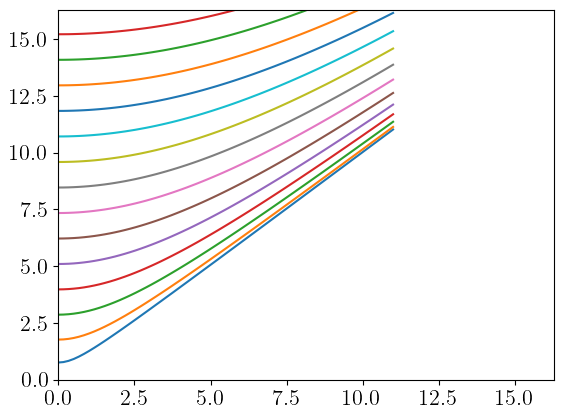

In [ ]:
for i in range(0, 16):
    plt.plot(k_tilde, pmodes(k_tilde, i))
plt.xlim(0,16.28928758)
plt.ylim(0,16.28928758)

In [ ]:
q = np.round(T_d/T_u, 3)
q

0.106

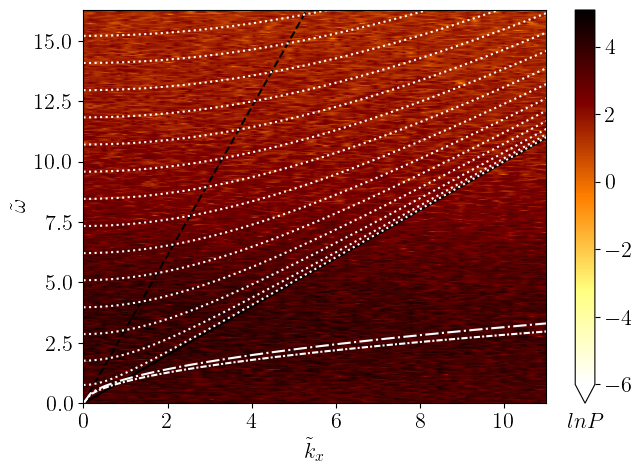

In [ ]:
vmin = -6; vmax = np.max(logP)
levels = np.linspace(vmin, vmax, 1000)
[X, Y] = np.meshgrid(k_tilde, om_tilde)
import matplotlib.colors as colors
fig, ax = plt.subplots(1, figsize=(7,5))
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
diag = ax.contourf(X, Y, logP[:,:], 4000, levels=levels, cmap='afmhot_r', vmin=vmin, vmax=vmax, extend='min')
# plt.contourf(X, Y, logP, 4000, cmap='afmhot_r', norm=colors.SymLogNorm(linthresh=0.01, linscale=0.01,
#                                               vmin=-3, vmax=logP.max(), base=10))
# plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')
plt.plot(k_tilde, cs_d*k_tilde/(omega0*L0), ls='-', c='k')
plt.plot(k_tilde, cs_u*k_tilde/(omega0*L0), ls='--', c='k')
plt.plot(k_tilde, np.sqrt(gz*k_tilde/(omega0*L0)), ls='-.', c='w')
plt.plot(k_tilde, np.sqrt(gz*k_tilde*((1-q)/(1+q))/(omega0*L0)), ls=(0, (3, 1, 1, 1)), c='w')
for i in range(0, 16):
    plt.plot(k_tilde, pmodes(k_tilde, i), c='w', ls=':')
# plt.axvline(x=2, c='k')
# plt.xlim(0,2*np.pi)
# plt.ylim(0,np.pi)
plt.ylim(0,16.28928758)
cbar = fig.colorbar(diag, cax=None, ax=ax)
ticks = np.arange(vmin, vmax, 2)
cbar.set_ticks(ticks)
cbar.ax.set_xlabel(r'$lnP$', labelpad=20)
# plt.colorbar()
plt.xlabel(r"$\tilde{k}_x$")
plt.ylabel(r"$\tilde{\omega}$")
plt.tight_layout()
# plt.savefig('plots/k_om.png')
plt.show()

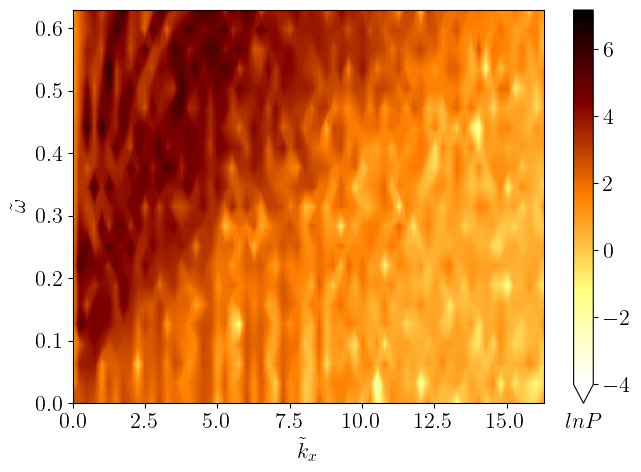

In [ ]:
vmin = -4; vmax = np.max(logP)
levels = np.linspace(vmin, vmax, 1000)
[X, Y] = np.meshgrid(k_tilde, om_tilde)
import matplotlib.colors as colors
fig, ax = plt.subplots(1, figsize=(7,5))
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
diag = ax.contourf(X, Y, logP, 4000, levels=levels, cmap='afmhot_r', vmin=vmin, vmax=vmax, extend='min')

# plt.axvline(x=2, c='k')
# plt.xlim(0,2*np.pi)
# plt.ylim(0,np.pi)
plt.ylim(0,0.62894752)
cbar = fig.colorbar(diag, cax=None, ax=ax)
ticks = np.arange(vmin, vmax, 2)
cbar.set_ticks(ticks)
cbar.ax.set_xlabel(r'$lnP$', labelpad=20)
# plt.colorbar()
plt.xlabel(r"$\tilde{k}_x$")
plt.ylabel(r"$\tilde{\omega}$")
plt.tight_layout()
# plt.savefig('plots/k_om.png')
plt.show()

In [ ]:
yaver = pc.read.aver(plane_list=['y'])

In [ ]:
yaver.y.t[-1]

8260.0

In [ ]:
yaver.y.t[500]

2500.0005

In [ ]:
uz_xz = yaver.y.uzmxz
u_dim = uz_xz.shape

In [ ]:
# indx_z = np.arange(0, 256, 2)
indx_z = np.linspace(z[0], z[-1], 300)
# uz_f_z =  np.empty([np.shape(uz_xz[:,0,1])[0], np.shape(uz_xz[:,0,1])[1], len(indx_z)], dtype=complex)
uz_f_z =  np.empty([u_dim[0], u_dim[1], len(indx_z)], dtype=complex)


for i in range(len(indx_z)):
    # exec(f'uz_fourier_{i} = np.fft.fftn(uz_xz[indx_t1:indx_t2,:,indx_z[{i}]], s=None, axes=(-2, -1), norm=None)')
    # exec(f'uz_fourier_kin{i} = np.fft.fftn(uz_xz[:,0,{i}], s=None, axes=(-2, -1), norm=None)')
    uz_f_z[:,:,i] = np.fft.fftn(uz_xz[:,:,i], s=None, axes=(-2, -1), norm='forward')

In [ ]:
logP_z = np.fft.fftshift(np.log(np.abs(uz_f_z/D**2)), axes=(-2,-1))

/tmp/ipykernel_3696234/1486173313.py:1: RuntimeWarning:

divide by zero encountered in log



In [ ]:
np.argmin(np.abs(indx_z-0))

249

In [ ]:
t_gd.shape

(39999,)

In [ ]:
t_gd[-1]-t_gd[0]

199.9917

In [ ]:
t_gd_y = yaver.y.t[200:]  #time interval where urms has reached a steady state
# t_len = np.size(t_gd)

# dkx = 2*np.pi/lx    #unit step along kx direction
# dom = 2*np.pi/t_len #unit step alomg omega direction

In [ ]:
n_omega_y, n_kx, _ = np.shape(uz_f_z[200:,:,:])

omega_y = 2*np.pi*np.arange(np.ceil(-n_omega_y/2), np.ceil(n_omega_y/2))/(max(t_gd_y) - min(t_gd_y))
# kx = 2*np.pi*np.arange(0,n_kx)/(max(x) - min(x))
kx = 2*np.pi*np.arange(np.ceil(-n_kx/2), np.ceil(n_kx/2))/(max(x) - min(x))

In [ ]:
n_omega_y

1453

In [ ]:
omega_y[-1]

0.6283185729763854

In [ ]:
max(t_gd_y)-min(t_gd_y)

7259.9995

In [ ]:
2*np.pi*n_omega_y/(max(t_gd_y) - min(t_gd_y))

1.257502598532628

In [ ]:
k_til = kx*L0
om_til = omega_y/omega0

In [ ]:
om_til

array([-0.62894752, -0.6280812 , -0.62721488, ...,  0.62721488,
        0.6280812 ,  0.62894752])

In [ ]:
k_til

array([-128.38137897, -128.13063409, -127.8798892 , ...,  127.62914432,
        127.8798892 ,  128.13063409])

Locator attempting to generate 3185 ticks ([-19.624, ..., 5.8480000000000025]), which exceeds Locator.MAXTICKS (1000).


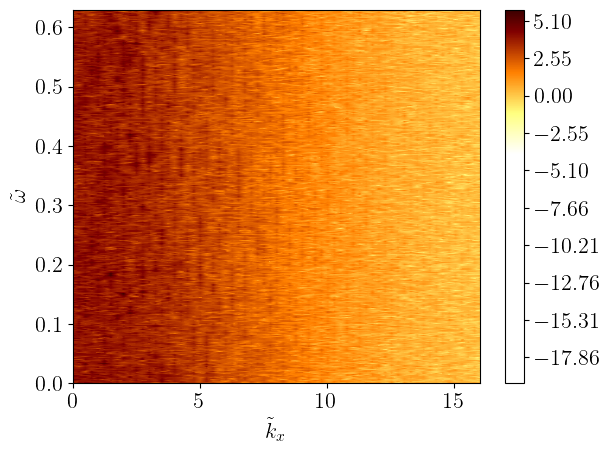

In [ ]:
[X, Y] = np.meshgrid(k_til, om_til)
#plt.contourf(X, Y, logP, 1500, cmap='inferno', vmin=np.min(logP), vmax=np.max(logP))
plt.contourf(X, Y, logP_z[200:,:,124], 4000, cmap='afmhot_r', vmin=-4, vmax=np.max(logP))
# plt.contourf(logP_z[:,:,124], 4000, cmap='afmhot_r', vmin=-4, vmax=np.max(logP))
# plt.plot(aa, np.sqrt(grz*aa), ls='dashdot', c='k')

# plt.plot(k_tilde, cs_d*k_tilde/(omega0*L0), ls='-', c='k')
# plt.plot(k_tilde, cs_u*k_tilde/(omega0*L0), ls='--', c='k')
# plt.plot(k_tilde, np.sqrt(gz*k_tilde/(omega0*L0)), ls='-.', c='w')
# plt.plot(k_tilde, np.sqrt(gz*k_tilde*((1-q)/(1+q))/(omega0*L0)), ls=(0, (3, 1, 1, 1)), c='w')
# for i in range(0, 16):
#     plt.plot(k_tilde, pmodes(k_tilde, i), c='w', ls=':')

# plt.axvline(x=2, c='k')
plt.xlim(0,16)
# plt.ylim(0,np.max(logP_z))
plt.ylim(0,np.max(om_til))
# plt.xlim(0,16.28928758)
# plt.ylim(0,16.28928758)
plt.colorbar()
plt.xlabel(r"$\tilde{k}_x$")
plt.ylabel(r"$\tilde{\omega}$")
plt.tight_layout()
# plt.savefig('plots/k_om.png')
plt.show()